# Investigation: Hardware Identification via noise fingerprint exploration
The code to produce the circuits then the code to run the circuits on hardware is given below. Another file has the code to run the ideal circuits, and the code to extract and store the normalised noise profiles.

## Imports

In [1]:
import qiskit
from qiskit import QuantumCircuit #Aer, IBMQ,
from qiskit import transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram

# importing datetime module for now()
import datetime


In [2]:
import circuit_funcs
import data_extract_funcs
#%run circuit_functions.ipynb

## Backends
The two backends that are accessible on the free plan are torino and brisbane. 
ibm_torino is Heron r1, ibm_brisbane is Eagle ... 
  
  
Otherwise it would be nice to use ibm_kingston (Heron r2) and ibm_pittsburgh (Heron r3) which are not so busy.

Note: It would be interesting to see 2 different hardware with same chip.

All of the available IBM QPUs can be found at this link:
https://quantum.cloud.ibm.com/computers

## Circuits
There are 3 circuits that will be tested in this investigation. The circuits are a V shape as illustrated in the figure below. They are equivalent to Indentity operations (final hadarmards are missing in image).

![WhatsApp Image 2025-09-13 at 13.21.13_d16e4418.jpg](<attachment:WhatsApp Image 2025-09-13 at 13.21.13_d16e4418.jpg>)
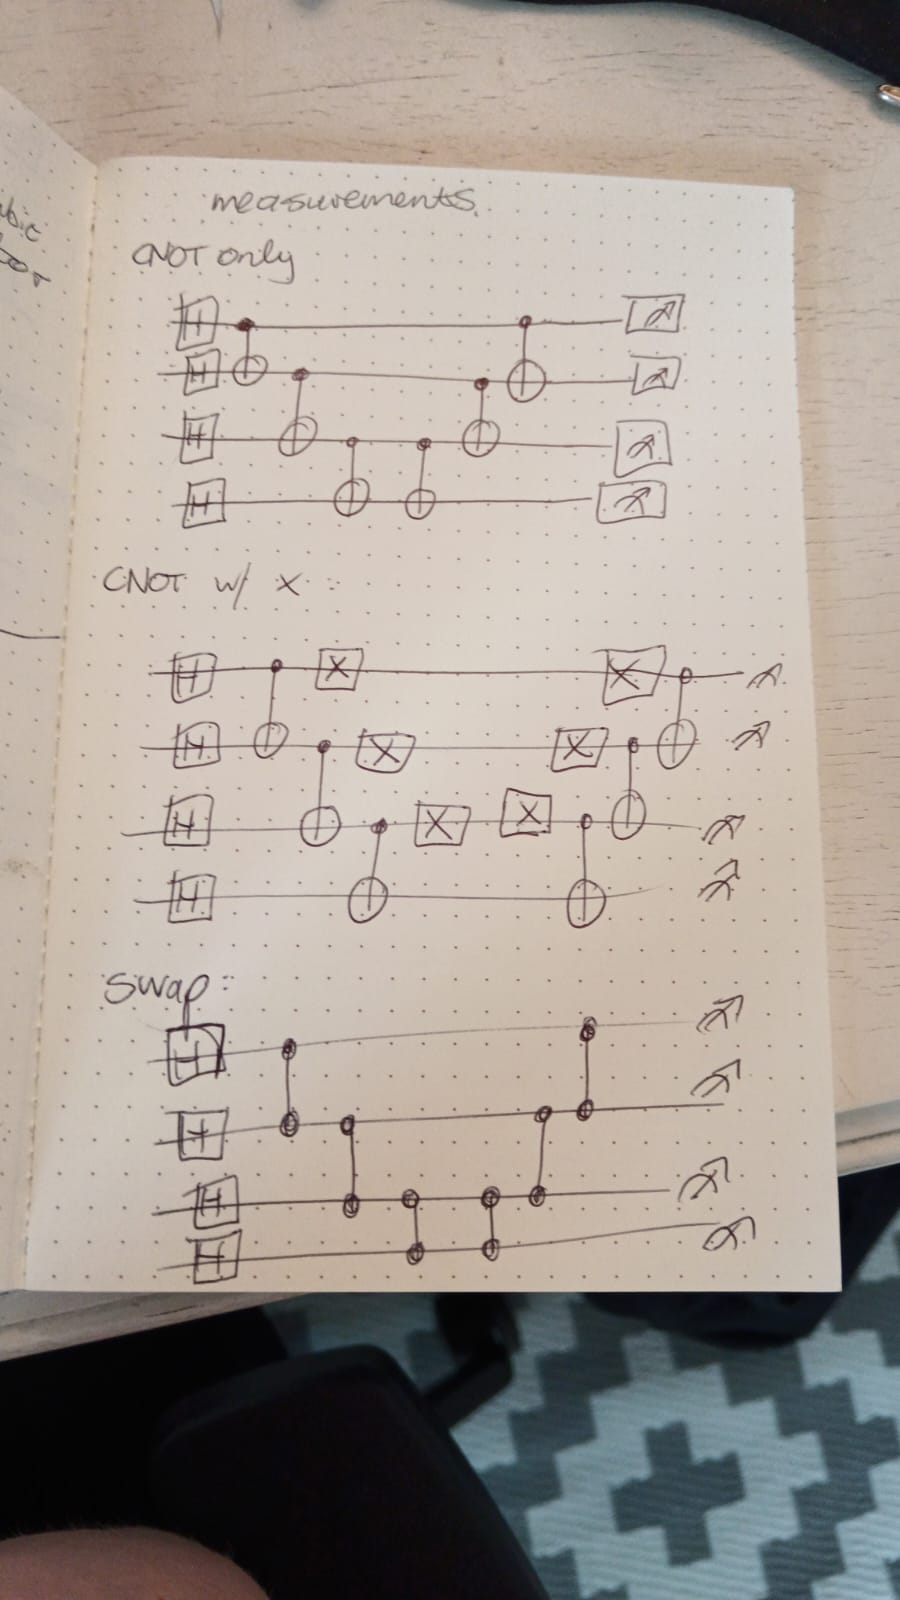

The circuits that will be tested in this investigation will have circuit sizes of 4, 8, 16, and 32 qubits 

# Sending Set to IBM backend

Loop for backend runs

In [5]:
#simple for loop to make data collection automated
nr_of_runs = 41
nr_qubits =8
file_name = "Job_IDs_Actual8_qubits.txt"


for run in range(nr_of_runs): 
    lines =circuit_funcs.send_and_record(nr_qubits,file_name)


c:\Users\RAMEE\Desktop\Quantum_Workshop\Day_1\.venv\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:837: UserWarning: The backend ibm_brisbane currently has a status of internal.
  warnings.warn(


# How to read the results
Format of text file is :
- ibm torino job ID
- ibm brisbane job ID
- date and time of jobs

## Extracting Data

In [4]:
nr_qubits = 4
file_names_4qubits = ['4q_torino1.csv','4q_torino2.csv','4q_torino3.csv','4q_brisbane1.csv','4q_brisbane2.csv','4q_brisbane3.csv']
file_names_8qubits = ['8q_torino1.csv','8q_torino2.csv','8q_torino3.csv','8q_brisbane1.csv','8q_brisbane2.csv','8q_brisbane3.csv']
file_names_16qubits = ['16q_torino1.csv','16q_torino2.csv','16q_torino3.csv','16q_brisbane1.csv','16q_brisbane2.csv','16q_brisbane3.csv']
file_names_32qubits = ['32q_torino1.csv','32q_torino2.csv','32q_torino3.csv','32q_brisbane1.csv','32q_brisbane2.csv','32q_brisbane3.csv']
file_names_test =['test_torino1.csv','test_torino2.csv','test_torino3.csv','test_brisbane1.csv','test_brisbane2.csv','test_brisbane3.csv']

dir = "../Hardware_results/testing/"
job_id_file = dir+"testing_ids.txt"

data_extract_funcs.results_to_csv2(nr_qubits,dir,file_names_8qubits,job_id_file)